In [7]:
import torch
import torch.nn as nn
import h5py
import numpy as np
import torchvision.transforms.functional as TF
import torchvision
from torchvision.utils import save_image
from PIL import Image
from sklearn.cluster import KMeans

from __init__ import *

In [3]:
def h5toNumpy(filepath):
    f = h5py.File(filepath, 'r')
    image = np.array(f['dataset'])
    energies = np.array(f['energies'])
    f.close()
    return image

In [18]:


toTensor = torchvision.transforms.ToTensor()

inTrainImage = h5toNumpy(parentdir + "\\" + "data\\panagia.h5").astype(np.float32)
inTrainImage = torch.from_numpy(inTrainImage)
inTrainImage = torch.reshape(inTrainImage, [21, 33, 2048])
inTrainImage = torch.swapaxes(inTrainImage,0,2);	inTrainImage = np.swapaxes(inTrainImage,1,2)
inTrainImage = torch.rot90(inTrainImage, 2, (2,1))

outTrainImage = toTensor(Image.open(parentdir + "\\" + "data\panagia.png").convert('RGB'))

inTestImage = h5toNumpy(parentdir + "\\" + "data\\jesus.h5").astype(np.float32)
inTestImage = torch.from_numpy(inTestImage)
inTestImage = torch.reshape(inTestImage, [31, 46, 2048])
inTestImage = torch.swapaxes(inTestImage,0,2);	inTestImage = np.swapaxes(inTestImage,1,2)
inTestImage = torch.rot90(inTestImage, 2, (2,1))

outTestImage = toTensor(Image.open(parentdir + "\\" + "data\jesus.png").convert('RGB'))

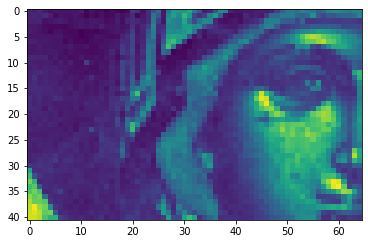

In [8]:
panagia1mmh5 = h5toNumpy(parentdir + "\\" + "data\\panagia1mm.h5").astype(np.float32)
panagia1mmh5 = torch.from_numpy(panagia1mmh5)
panagia1mmh5 = torch.reshape(panagia1mmh5, [41, 65, 2048])
panagia1mmh5 = torch.swapaxes(panagia1mmh5,0,2);	panagia1mmh5 = np.swapaxes(panagia1mmh5,1,2)
panagia1mmh5 = torch.rot90(panagia1mmh5, 2, (2,1))
panagia1mmh5_flat = panagia1mmh5.reshape(2048, 41*65)
plt.imshow(panagia1mmh5.sum(dim=0))

In [66]:
def show_clusters(image, num_clusters=12, nrows=2, ncols=5):
    
    h = image.shape[1]
    w = image.shape[2]
    num_channels = image.shape[0]

    image_flat = image.reshape(num_channels, h*w)

    km = KMeans(n_clusters=num_clusters)
    km = km.fit(image_flat)
    
    count_clusters = [0 for i in range(num_clusters)]
    for label in km.labels_:
        count_clusters[label] += 1

    clusters = []
    for cluster in km.cluster_centers_:
        clusters.append(cluster.reshape(h,w))

    fix, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,10))

    c_i = 0
    for r in range(nrows):
        for c in range(ncols):
            ax[r,c].imshow(clusters[c_i])
            ax[r,c].text(-1.0, -1.0, count_clusters[c_i])
            c_i += 1
    
    return clusters, count_clusters

torch.Size([2048, 41, 65])


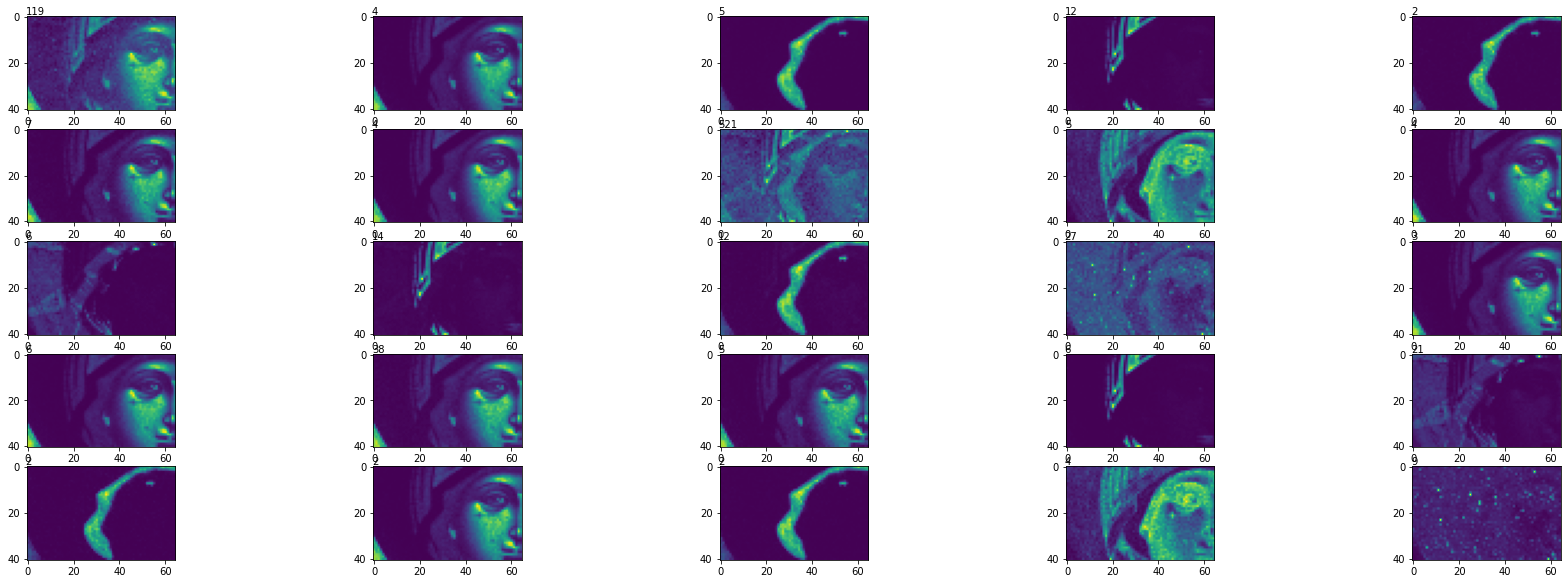

In [67]:
clusters, count_clusters = show_clusters(panagia1mmh5[60:900,:,:],num_clusters=25,nrows=5,ncols=5)
print(panagia1mmh5.shape)

In [69]:
def dist(x,y):
    return np.sum(np.abs(x-y))

def normalize(X):
    return X / np.linalg.norm(X)

distances=np.zeros([25,25])
for i in range(25):
    for j in range(25):
        distances[i][j]=dist(normalize(clusters[i]),normalize(clusters[j]))
print(distances)
          


[[ 0.         26.01094    53.21247413 46.94316974 53.03910465 25.60613201
  25.89301932 17.82992518 27.99746611 26.03249174 48.48895326 43.61894145
  51.66051622 24.65276103 26.35912523 26.1288221  23.33138607 25.95167553
  47.69436919 42.26821917 52.86153711 25.86656095 53.13043973 27.9546593
  25.58432169]
 [26.01094     0.         41.28884589 36.75716977 41.25459736  2.75487304
   1.99816797 42.43687554 39.01515174  2.26141165 53.50841735 37.24414319
  40.23086496 47.40365043  2.14329189  1.77857546  3.81215973  2.44064579
  36.92398374 50.75076833 41.13722354  2.11314007 41.25855505 38.86958367
  45.66819766]
 [53.21247413 41.28884589  0.         31.67377274  1.88305099 41.46635843
  41.51121476 51.93568289 54.0000783  41.26800513 42.17377492 33.71423478
   2.53089471 55.22363798 41.04564005 41.19531717 42.67224965 41.30303518
  31.50683345 45.42259955  2.24765564 41.5226953   1.57000689 53.84113153
  50.21155895]
 [46.94316974 36.75716977 31.67377274  0.         31.58687621 36.674

In [19]:
inTestImage = inTestImage[60:900,:,:]
inTrainImage = inTrainImage[60:900,:,:]

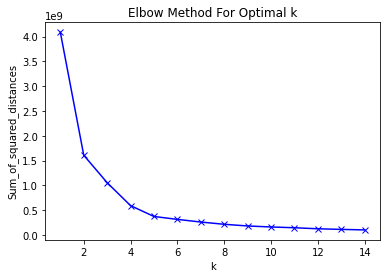

In [4]:
inTestImageFlat = inTestImage.reshape(840, 31*46)
inTestImageOriginal = inTestImageFlat.reshape(840,31,46)


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(inTestImageFlat)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

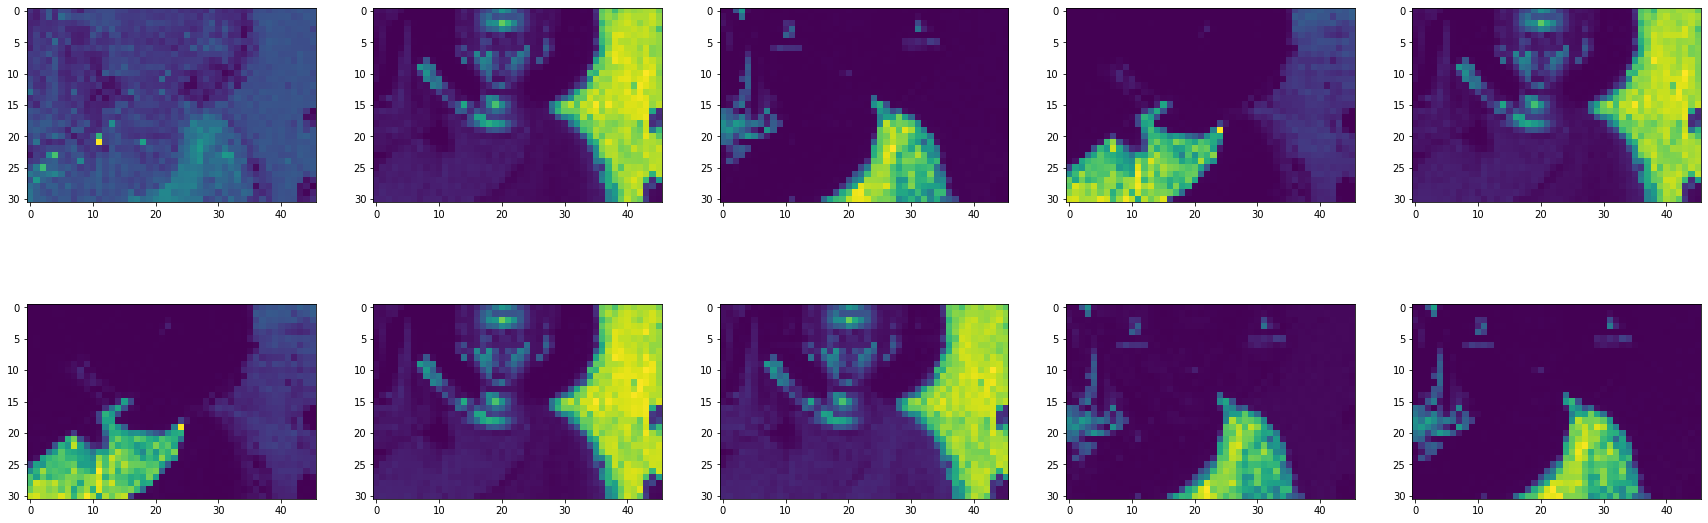

In [10]:
km = KMeans(n_clusters=10)
km = km.fit(inTestImageFlat)

clusters = []
for cluster in km.cluster_centers_:
    clusters.append(cluster.reshape(31,46))

fix, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

ax[0,0].imshow(clusters[0])
ax[0,1].imshow(clusters[1])
ax[0,2].imshow(clusters[2])
ax[0,3].imshow(clusters[3])
ax[0,4].imshow(clusters[4])
ax[1,0].imshow(clusters[5])
ax[1,1].imshow(clusters[6])
ax[1,2].imshow(clusters[7])
ax[1,3].imshow(clusters[8])
ax[1,4].imshow(clusters[9])


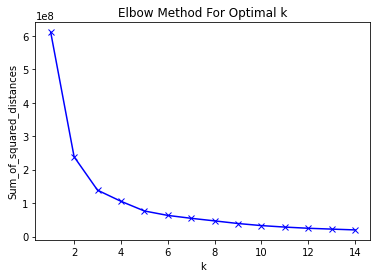

In [21]:
inTrainImageFlat = inTrainImage.reshape(840, 21*33)
inTrainImageOriginal = inTrainImageFlat.reshape(840,21,33)

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(inTrainImageFlat)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

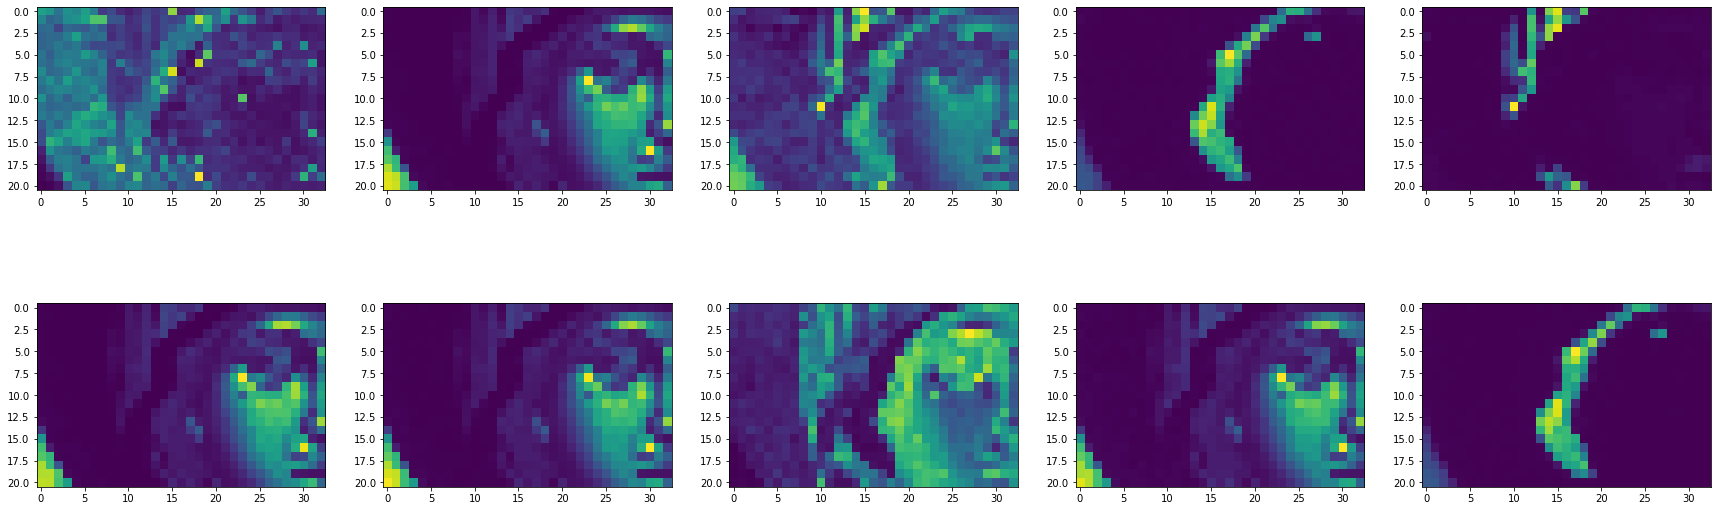

In [23]:
km = KMeans(n_clusters=10)
km = km.fit(inTrainImageFlat)

clusters = []
for cluster in km.cluster_centers_:
    clusters.append(cluster.reshape(21,33))

fix, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

ax[0,0].imshow(clusters[0])
ax[0,1].imshow(clusters[1])
ax[0,2].imshow(clusters[2])
ax[0,3].imshow(clusters[3])
ax[0,4].imshow(clusters[4])
ax[1,0].imshow(clusters[5])
ax[1,1].imshow(clusters[6])
ax[1,2].imshow(clusters[7])
ax[1,3].imshow(clusters[8])
ax[1,4].imshow(clusters[9])


In [1]:
clusters[1] - clusters[6]

NameError: name 'clusters' is not defined